<img src="ost_logo.png" width="240" height="240" align="right"/>
<div style="text-align: left"> <b> Machine Learning </b> <br> MSE FTP MachLe <br> 
<a href="mailto:christoph.wuersch@ost.ch"> Christoph Würsch </a> </div>


# Lab10, A4 Necessity of Feature-Scaling for the PCA


Feature scaling through **standardization** (or Z score normalization) can be an important pre-processing step for many machine learning processes. Since many algorithms (such as SVM, K-nearest neighbors, and logistic regression) require the normalization of features, we can analyze the importance of scaling data using the example of __Principal Component Analysis (PCA)__.

In PCA, we are interested in the components that maximize variance. If one component (e.g., height) varies less than another (e.g., weight) just because different scales are used (meters vs. kilos), PCA could determine that the direction of maximum variance is assigned to weight rather than size if these characteristics are not scaled. But the change in height of one meter can be considered much more important than the change in weight of one kilogram. This assignment is therefore clearly wrong.

To illustrate this, we now go through a PCA by scaling the data with the class `StandardScaler` from the module `sklearn.preprocessing`. The results are visualized and compared with the results of unscaled data. We will notice a clearer difference when using standardization. The data set used is the wine data set available from UCI. This data set has continuous features that are heterogeneous due to the different magnitudes of the characteristics they measure (e.g. alcohol content and malic acid).

The transformed data is then used to train a __naive Bayesian classifier__. Significant differences in predictive accuracy can be observed, with the data set that was scaled before PCA was applied far exceeding the unscaled version.



### (a) Import of the used classes

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline


In [2]:
RANDOM_STATE = 42
FIG_SIZE = (10, 7)

features, target = load_wine(return_X_y=True)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

### (b) Split in training and test dataset

In [3]:
# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)

### (c) Create a `pipeline` 

We use a __Pipeline__ to perform a PCA with two main components and then train a *Naive Bayes classifier*. Then we look at the Accuracy on the test data. We do this without scaling the features.

In [4]:
# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Show prediction accuracy in unscaled data.
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))


Prediction accuracy for the normal test dataset with PCA
81.48%



### (d) PCA using 4 principal components (without standardization / scaling of the data)

In [5]:
unscaled_clf = make_pipeline(PCA(n_components=4), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Show prediction accuracy in unscaled data.
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))



Prediction accuracy for the normal test dataset with PCA
98.15%



### (f) New pipeline with scaled features
The features are now scaled for comparison.

In [6]:
# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

### (g) Prediction accuracy for the scaled data (using two principal components)

In [7]:
# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the normal test dataset with PCA
98.15%



### (h) plotting the main components

Now we get the main components, once for the unscaled, once for the scaled case.

In [8]:
# Extract PCA from pipeline
pca = unscaled_clf.named_steps['pca']
X_train_unscaled=pca.transform(X_train)
pca_std = std_clf.named_steps['pca']

In [9]:
# Show first principal componenets
print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPC 1 with scaling:\n', pca_std.components_[0])


PC 1 without scaling:
 [ 1.76342917e-03 -8.35544737e-04  1.54623496e-04 -5.31136096e-03
  2.01663336e-02  1.02440667e-03  1.53155502e-03 -1.11663562e-04
  6.31071580e-04  2.32645551e-03  1.53606718e-04  7.43176482e-04
  9.99775716e-01]

PC 1 with scaling:
 [ 0.13443023 -0.25680248 -0.0113463  -0.23405337  0.15840049  0.39194918
  0.41607649 -0.27871336  0.33129255 -0.11383282  0.29726413  0.38054255
  0.27507157]


The 1st main component in the unscaled set can be seen. You can see that feature #13 dominates the direction because it is several orders of magnitude above the other features. This is in contrast to viewing the main component for the scaled version of the data. In the scaled version, the orders of magnitude are approximately the same for all features.

In [10]:
# Scale and use PCA on X_train data for visualization.

scaler = std_clf.named_steps['standardscaler']
X_train_std = pca_std.transform(scaler.transform(X_train))

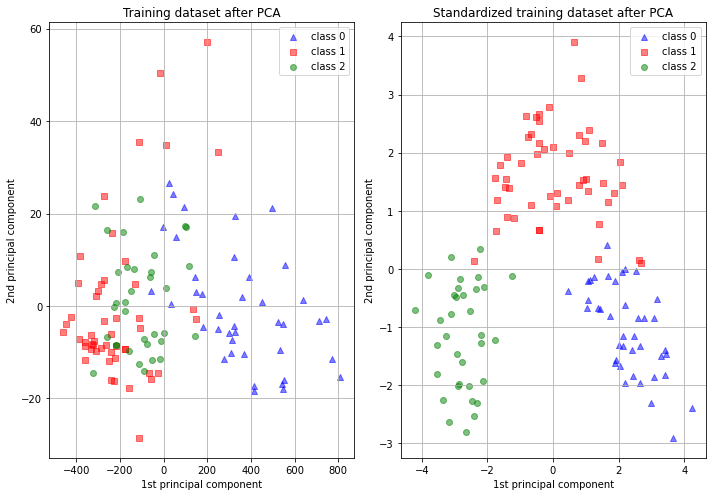

In [11]:
# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)


for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train_unscaled[y_train == l, 0], X_train_unscaled[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train == l, 0], X_train_std[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()